# Decades
This notebook is to plot our cluster data created in the Training-Model Notebook per decade.

## Setup
First, the notebook will setup dependencies and import the data to be used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import library as lib

In [2]:
image_filepath = "../images/plots/decades"

In [3]:
df = lib.import_music_df_with_model()
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1
1,El Paso,Marty Robbins,3,1960,2,1,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1
2,El Paso,Marty Robbins,29,1960,2,29,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1
3,El Paso,Marty Robbins,86,1960,3,28,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.13,0.586,94.267,1


Next, the notebook will create the Decade column. This column represents the decade each song charted in. Note that some songs could chart in multiple decades.

In [4]:
# Decades
df['Decade'] = (10 * (df['Year'] // 10)).astype(str) + 's'
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Decade
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1,1960s
1,El Paso,Marty Robbins,3,1960,2,1,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1,1960s
2,El Paso,Marty Robbins,29,1960,2,29,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1,1960s
3,El Paso,Marty Robbins,86,1960,3,28,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662,1,1960s
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.13,0.586,94.267,1,1960s


After creating the decade column, the notebook will find the highest placement for that song per decade. This is so that one song doesn't skew the data if it charted over multiple week in the decade.

In [5]:
"""
Sort by Track, Artist, and Placement.
This is so that only keep the highest placement will be kept when drop_duplicates is called.
"""
df = df.sort_values(by=["Track", "Artist", "Placement"])

"""
Drop duplicates.
"""
df = df.drop_duplicates(subset=['Track', "Artist", "Decade"])

"""
Re-sort the dataframe by date.
"""
df = df.sort_values(by=["Year", "Month", "Day", "Placement"])
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Decade
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1,1960s
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1,1960s
7,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,2,1960s
14,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,0,1960s
16,It's Time To Cry,Paul Anka,7,1960,1,4,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,2,1960s


## Plots
After cleaning the data, now the notebook will conduct a series of plots on the data to see what trends there are. For this, the notebook will be looking at the average for each of the musical attributes.

In [6]:
# Group by Decade and find the mean for values.
decade_gb = df.groupby(by=["Decade", "Cluster"])
decade_mean_df = decade_gb.mean()
decade_mean_df

Placement         Year     Month        Day  danceability  \
Decade Cluster                                                              
1960s  0        44.818874  1964.552511  6.487062  16.208524      0.433618   
       1        46.823529  1964.639562  6.559400  15.874279      0.506253   
       2        42.227131  1964.773909  6.598233  16.445946      0.586223   
1970s  0        45.191700  1973.841897  6.446640  16.306324      0.445437   
       1        43.649529  1974.028965  6.499638  16.259957      0.570884   
       2        43.895854  1974.797776  6.829626  16.041456      0.602632   
1980s  0        38.204225  1984.157277  6.575117  15.568075      0.505932   
       1        38.067236  1984.515475  6.472785  16.510139      0.617735   
       2        40.809547  1984.386692  6.581967  16.192382      0.651755   
1990s  0        45.539062  1994.486979  6.565104  15.062500      0.539378   
       1        44.664735  1994.691225  6.421358  15.966887      0.683505   
       2        44.023936  1993.978723  6.135638  15.678191      0.650715   
2000s  0        47.896429  2005.153571  6.862500  15.639286      0.525673   
       1        43.020458  2004.110475  6.797054  15.597381      0.665769   
       2        45.918047  2004.955536  6.832607  16.107236      0.642126   
2010s  0        53.206795  2014.667651  6.787297  16.240768      0.570806   
       1        49.950584  2015.006289  6.610961  16.203953      0.645614   
       2        47.960256  2014.399574  6.553584  16.325763      0.672568   

                  energy       key   loudness  speechiness  acousticness  \
Decade Cluster                                                             
1960s  0        0.556450  5.140030 -10.086195     0.063841      0.520732   
       1        0.457913  5.153979 -10.898759     0.044476      0.585678   
       2        0.544462  5.124220 -10.154240     0.048723      0.497743   
1970s  0        0.595150  4.841897 -10.326138     0.063771      0.366760   
       1        0.531302  5.168718 -10.968492     0.049369      0.400316   
       2        0.620209  5.183519 -10.109639     0.052842      0.292937   
1980s  0        0.680694  4.971831  -9.753542     0.056541      0.191411   
       1        0.583746  5.275347 -10.418909     0.043818      0.270495   
       2        0.677747  5.359209  -9.670502     0.045772      0.177507   
1990s  0        0.649130  5.544271  -8.522104     0.094862      0.187290   
       1        0.642161  5.564570  -8.478810     0.099619      0.170987   
       2        0.679541  5.272163  -8.519942     0.050390      0.159596   
2000s  0        0.749929  5.051786  -5.347782     0.113863      0.122627   
       1        0.697983  5.292962  -5.796957     0.118837      0.155240   
       2        0.715298  5.330427  -5.712820     0.067742      0.153408   
2010s  0        0.710435  5.375185  -5.587080     0.139099      0.154378   
       1        0.661456  5.283019  -6.027381     0.104669      0.181703   
       2        0.685440  5.287438  -5.889934     0.094868      0.150483   

                liveness   valence       tempo  
Decade Cluster                                  
1960s  0        0.226915  0.702796  169.214359  
       1        0.216218  0.589319   91.936406  
       2        0.218991  0.718144  125.732999  
1970s  0        0.207755  0.653667  167.225636  
       1        0.184000  0.628905   93.821733  
       2        0.196038  0.693260  125.635395  
1980s  0        0.185031  0.671798  167.917833  
       1        0.173573  0.598136   94.411923  
       2        0.186877  0.680879  124.797557  
1990s  0        0.177203  0.564703  170.547083  
       1        0.179030  0.583926   94.093365  
       2        0.180643  0.588432  125.328016  
2000s  0        0.195570  0.531465  166.167755  
       1        0.179501  0.573203   92.373327  
       2        0.182470  0.543281  127.509574  
2010s  0        0.192555  0.508660  165.341536  
       1        0.182021  0.483624   92.170379  
       2        0.18671

In [7]:
# Define data columns
columns = [
    "Placement", 
    "danceability",
    "energy",
    "key",
    "loudness",
    "speechiness",
    "acousticness",
    "liveness",
    "valence",
    "tempo"
]

# Define Legend Labels
legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]

### Bar Charts

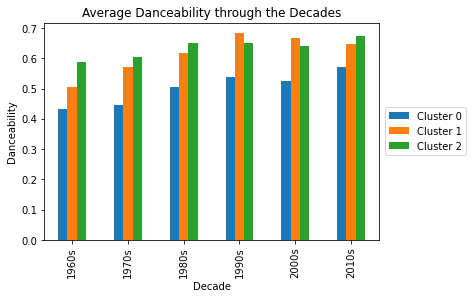

In [8]:
# Create Bar Charts
def decade_bar_chart(df, column, legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]):
    title = f"Average {column.capitalize()} through the Decades"
    axis = df[[column]].unstack('Cluster').plot(kind="bar", title=title)
    axis.set_ylabel(column.capitalize())
    axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
    
decade_bar_chart(decade_mean_df, "danceability", legend_labels)
plt.show()

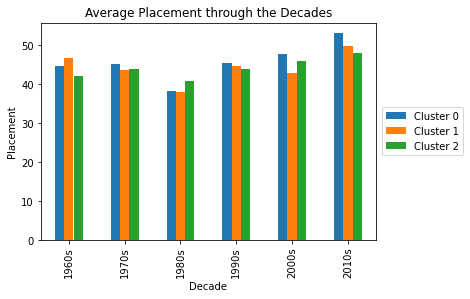

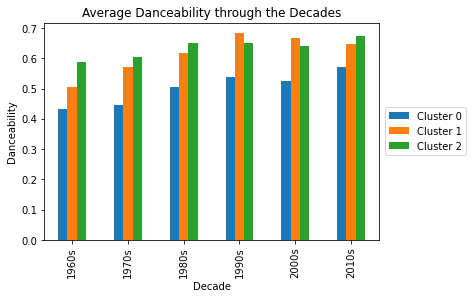

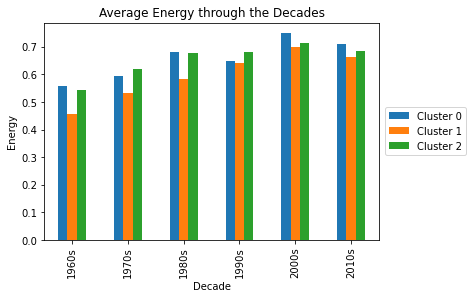

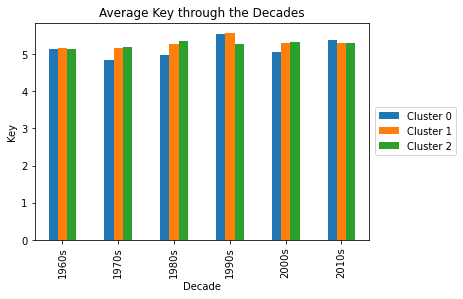

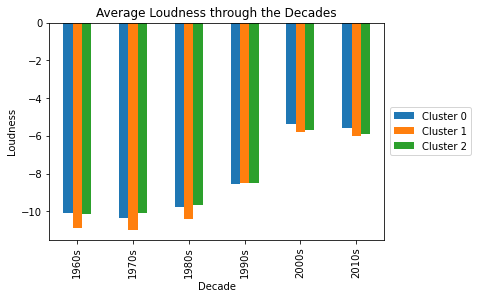

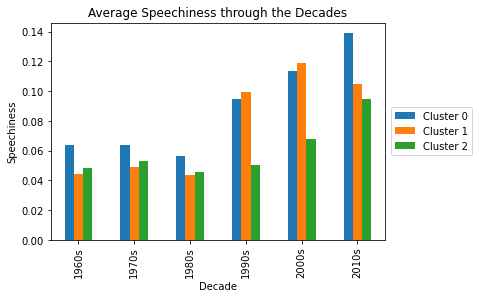

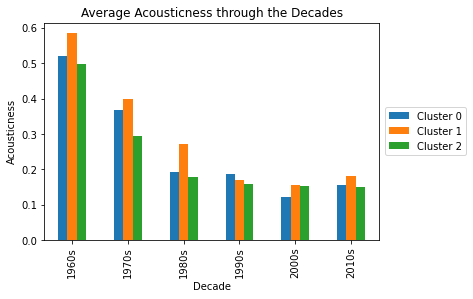

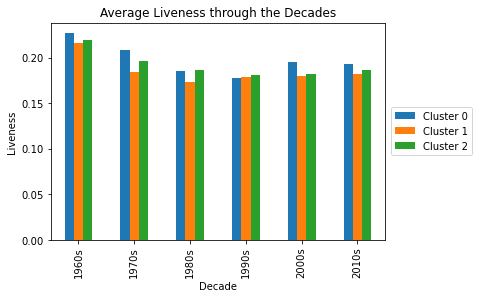

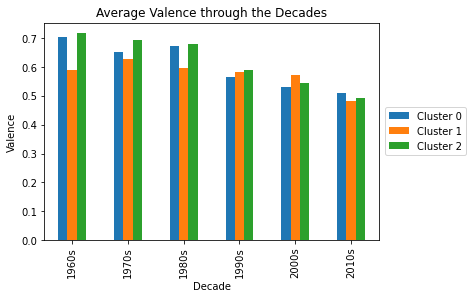

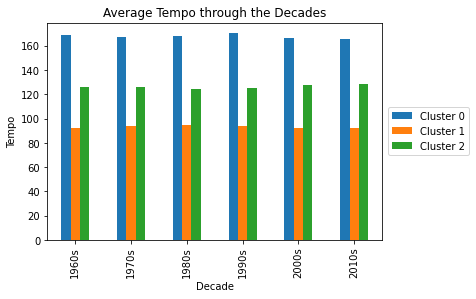

In [9]:
for column in columns:
    decade_bar_chart(decade_mean_df, column, legend_labels)
    plt.savefig(f"{image_filepath}/bar/{column.lower()}.png", bbox_inches='tight')
    plt.show()

### Line Charts

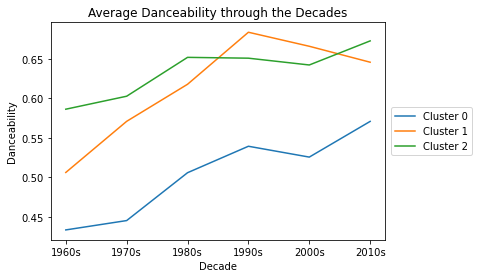

In [10]:
def decade_line_chart(df, column, legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]):
    title = f"Average {column.capitalize()} through the Decades"
    data = df
    if(column):
        data = df[[column]]
    axis = data.unstack('Cluster').plot(kind="line", title=title)
    axis.set_ylabel(column.capitalize())
    axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
    
decade_line_chart(decade_mean_df, "danceability", legend_labels)
plt.show()

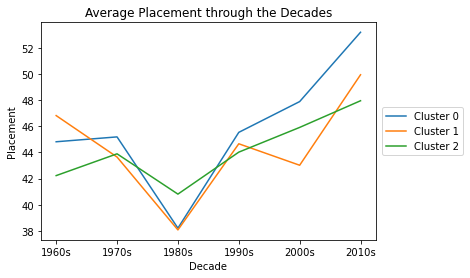

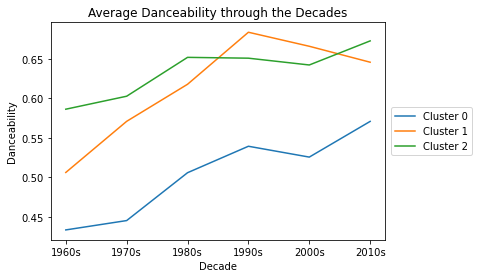

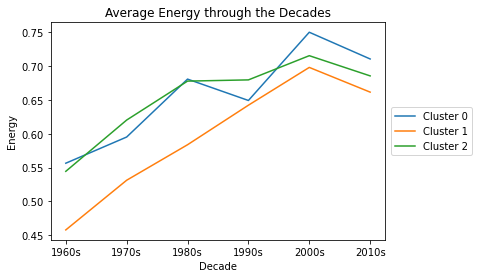

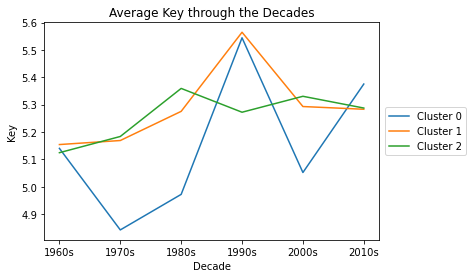

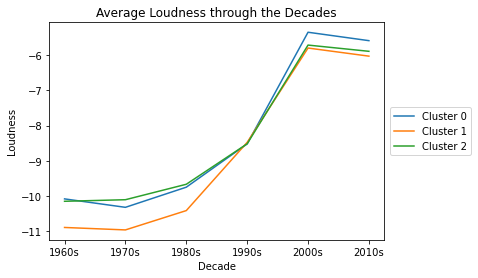

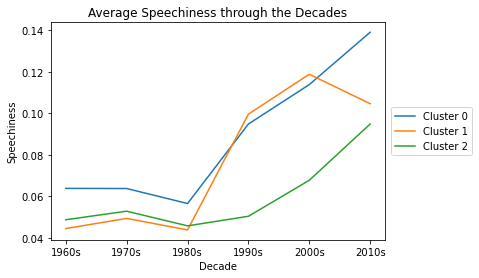

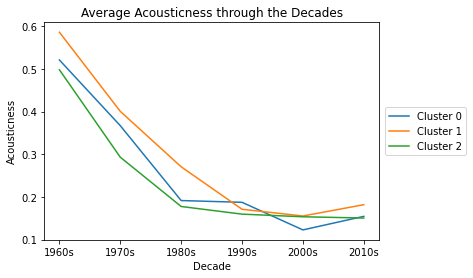

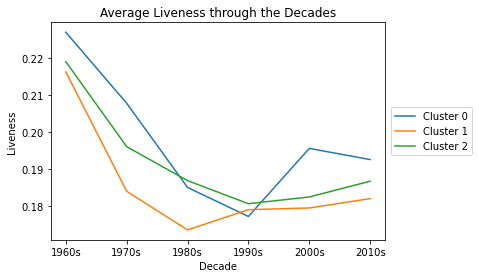

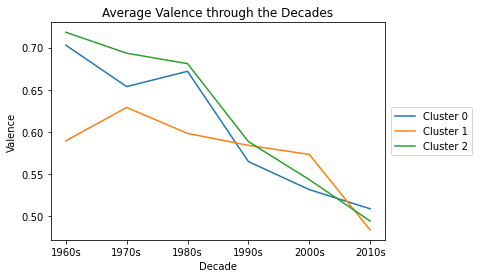

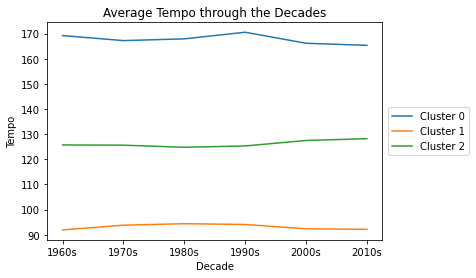

In [11]:
for column in columns:
    decade_line_chart(decade_mean_df, column, legend_labels)
    plt.savefig(f"{image_filepath}/line/{column.lower()}.png", bbox_inches='tight')
    plt.show()

### Count of Hits
Let's look at the number of hits per cluster per decade.

In [22]:
hits_counts_df = decade_gb.count()
hits_counts_df = hits_counts_df["Track"]

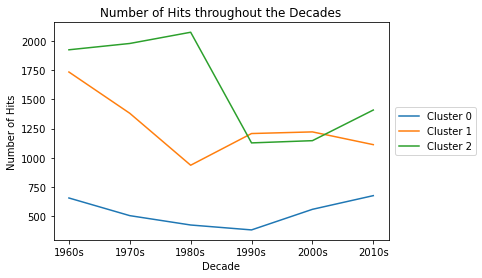

In [21]:
axis = hits_counts_df.unstack('Cluster').plot(kind="line", title = "Number of Hits throughout the Decades")
axis.set_ylabel("Number of Hits")
axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
plt.savefig(f"{image_filepath}/line/number_of_hits.png", bbox_inches='tight')
plt.show()

### Count of Number 1 Hits
One additional aspect to look at is to see how many clusters hit the number 1 position within each decade.

In [12]:
number_one_df = df[df["Placement"] == 1]
number_one_df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Decade
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1,1960s
11,Running Bear,Johnny Preston,1,1960,2,1,0.772,0.297,5.0,-14.679,0.0530,0.854,0.125,0.822,119.987,2,1960s
397,Cathy's Clown,The Everly Brothers,1,1960,5,23,0.498,0.582,7.0,-8.961,0.0339,0.412,0.372,0.866,119.809,2,1960s
514,I'm Sorry,Brenda Lee,1,1960,7,18,0.558,0.223,10.0,-12.362,0.0299,0.868,0.130,0.303,101.711,1,1960s
698,Mr. Custer,Larry Verne,1,1960,10,10,0.697,0.697,4.0,-4.863,0.0537,0.707,0.156,0.582,108.500,1,1960s


In [13]:
number_one_gb = number_one_df.groupby(["Decade", "Cluster"])
number_one_gb.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Decade
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.83500,0.1600,0.691,106.662,1,1960s
11,Running Bear,Johnny Preston,1,1960,2,1,0.772,0.297,5.0,-14.679,0.0530,0.85400,0.1250,0.822,119.987,2,1960s
397,Cathy's Clown,The Everly Brothers,1,1960,5,23,0.498,0.582,7.0,-8.961,0.0339,0.41200,0.3720,0.866,119.809,2,1960s
514,I'm Sorry,Brenda Lee,1,1960,7,18,0.558,0.223,10.0,-12.362,0.0299,0.86800,0.1300,0.303,101.711,1,1960s
698,Mr. Custer,Larry Verne,1,1960,10,10,0.697,0.697,4.0,-4.863,0.0537,0.70700,0.1560,0.582,108.500,1,1960s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59987,We Are Young,fun. Featuring Janelle Monae,1,2012,3,24,0.378,0.638,10.0,-5.576,0.0750,0.02000,0.0849,0.735,184.086,0,2010s
60825,We Are Never Ever Getting Back Together,Taylor Swift,1,2012,9,8,0.628,0.676,7.0,-5.911,0.0916,0.00957,0.1020,0.750,85.984,1,2010s
60653,One More Night,Maroon 5,1,2012,10,6,0.718,0.820,5.0,-3.453,0.0323,0.04440,0.0846,0.613,92.998,1,2010s
62579,Happy,Pharrell Williams,1,2014,3,22,0.647,0.822,5.0,-4.662,0.1830,0.21900,0.0908,0.962,160.019,0,2010s


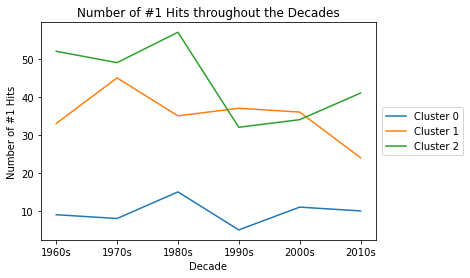

In [14]:
number_one_count_df = number_one_gb["Track"].count()

axis = number_one_count_df.unstack('Cluster').plot(kind="line", title = "Number of #1 Hits throughout the Decades")
axis.set_ylabel("Number of #1 Hits")
axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
plt.savefig(f"{image_filepath}/line/number_ones.png", bbox_inches='tight')
plt.show()